
# Network properties, e.g. does it pick padded jets more often?

In [13]:
import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"]="6"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, Conv2D, Flatten, Dropout
import ptetaphi_nn
import tools
with open("filepath.txt", 'r') as f:
    filename = f.read()
    
s_table = tools.open_file(filename, sort_by="tag")
# filter by realistic situation where we have 3 tags and 3 or 4 jets.
# ignore the case where there may be >4 since those are pretty rare
nb4 = (s_table.nbjets == 3) | (s_table.nbjets == 4) # 3 or 4 b-jets exist
nt3 = s_table.nbtags==3  # 3 b tags
nb4nt3 = nb4 & nt3
events = s_table[nb4nt3]
print(len(events))

# and ensure that the 3 tags are actually correct
# this results in very little event loss
events = events[events.truth[:,0] == 1]
events = events[events.truth[:,1] == 1]
events = events[events.truth[:,2] == 1]
print(len(events))

sorting data by tag
308955
303925


In [50]:
import importlib
importlib.reload(ptetaphi_nn)
importlib.reload(tools)
#nn = ptetaphi_nn.PtEtaPhiNN(events, load=("architecture_2b.json", "weights_2b.h5"), njets=10)
nn = ptetaphi_nn.PtEtaPhiNN(events, njets=10)
nn.learn(epochs=1000)
nn.evaluate(savename="2_after_scaling_update")

INITIALIZING NN
padding events
padding with 0
creating default model
scaling nn input
jet index index 0
256.3276 27998.176
pt mean 256.3276 var 27998.176
-0.0011497315 1.0672952
eta mean -0.0011497315 var 1.0672952
0.0058776834 3.294643
phi mean 0.0058776834 var 3.294643
jet index index 1
165.617 14555.202
pt mean 165.617 var 14555.202
-0.0050640516 1.1507123
eta mean -0.0050640516 var 1.1507123
-0.0033597539 3.2904913
phi mean -0.0033597539 var 3.2904913
jet index index 2
77.255394 1920.3323
pt mean 77.255394 var 1920.3323
-0.0011337758 1.1795502
eta mean -0.0011337758 var 1.1795502
-0.001709125 3.2910662
phi mean -0.001709125 var 3.2910662
jet index index 3
158.77132 20563.79
pt mean 159.41702 var 20544.479
-0.0030505974 2.473648
eta mean -0.0030630042 var 2.4837081
0.010378056 3.2739377
phi mean 0.010420264 var 3.2872517
jet index index 4
58.19318 4144.4634
pt mean 74.52002 var 4090.5688
0.004213381 2.7266903
eta mean 0.005395501 var 3.4916925
-0.00059232395 2.5747275
phi mean -0.00

KeyboardInterrupt: 

# figure out how many times we pick a padded jet

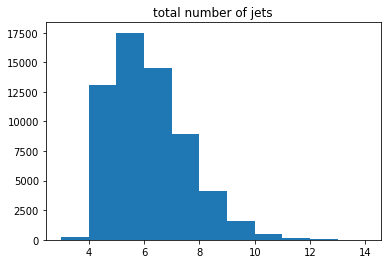

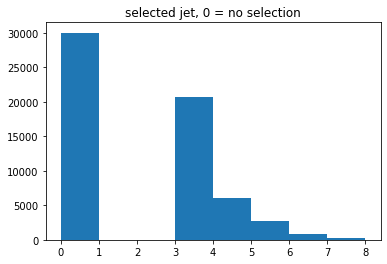

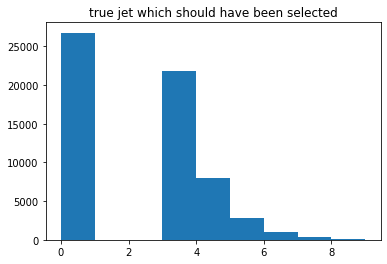

0


In [43]:
import matplotlib.pyplot as plt
import numpy as np
test_events = nn.events[nn.test]

# get number of jets that were actually in each event
nn_njets = test_events.njets
plt.hist(nn_njets, bins=11)
plt.title("total number of jets")
plt.show()

# if jet_selected[i]=0, that means no jet was selected
jet_selected = np.argmax(nn.selections, axis=1)
plt.hist(jet_selected, bins=8)
plt.title("selected jet, 0 = no selection")
plt.show()

# by construction we either have 1 real jet or no real jet, no 2+ real jet events
jet_real = nn.truth
jet_real[:,0:3] = 0
jet_real = np.argmax(jet_real, axis=1)
plt.hist(jet_real, bins=9)
plt.title("true jet which should have been selected")
plt.show()


# if the selection was above njets, it was a padded jet
print(np.count_nonzero(jet_selected > nn_njets))